### LAB 12-3 오토인코더를 이용한 이미지 압축과 복원

In [2]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(64, input_shape=(784, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(64, activation='elu')])
dec = models.Sequential([layers.Dense(64, input_shape=(64, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(784, activation='elu')])

In [5]:
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                58560     
                                                                 
 sequential_1 (Sequential)   (None, 784)               59280     
                                                                 
Total params: 117,840
Trainable params: 117,840
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: 2152.5117
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1263.7374
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1127.8862
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1066.4836
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1029.1183
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1002.4737
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 982.8528
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 967.0528
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 953.8589
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 942.9600
Epoch 11/15
1875/1875 [==============================] - 5s 3ms/step - loss: 932.8295
Epoch 12/15
1875/1875 [==============================] - 

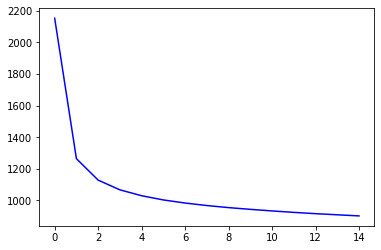

In [6]:
X = train_images.reshape(-1, 28*28)
history = AE.fit(X, X, epochs = 15)
plt.plot(history.history['loss'], 'b-')

In [7]:
rndidx = np.random.randint(0, len(train_images) - 50)
data = X[rndidx:rndidx+50]
train_reduced = enc.predict(data)
print(train_reduced.shape)

(50, 64)


<Figure size 432x288 with 0 Axes>

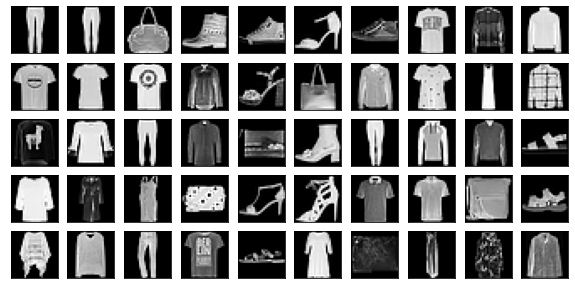

<Figure size 432x288 with 0 Axes>

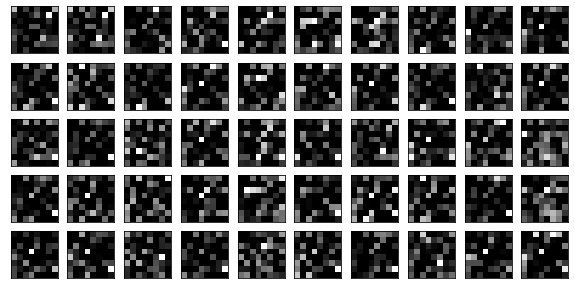

In [8]:
plot_images(5, 10, data.reshape(-1, 28, 28))
plot_images(5, 10, train_reduced.reshape(-1, 8, 8))

<Figure size 432x288 with 0 Axes>

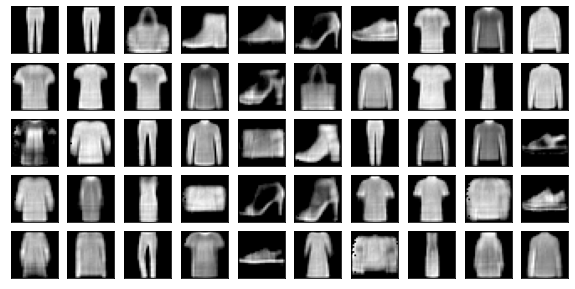

In [9]:
recovered = dec.predict(train_reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

<Figure size 432x288 with 0 Axes>

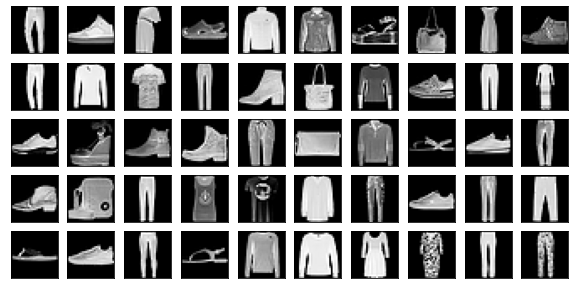

In [10]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

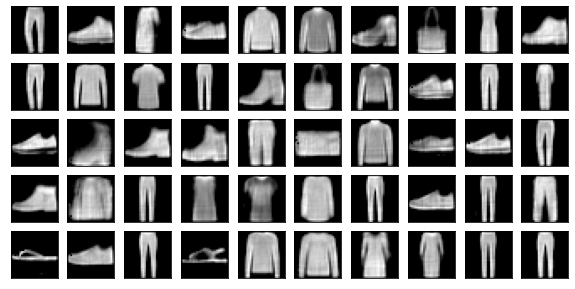

In [11]:
sample_flat = samples.reshape(-1, 28*28)
sample_reduced = enc.predict(sample_flat)
recovered = dec.predict(sample_reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

In [12]:
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
enc_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                589888    
                                                                 
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [13]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 9216)              599040    
                                                                 
 reshape (Reshape)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 26, 26, 16)       2320      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 18s 4ms/step - loss: 1168.6074
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 674.4099
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 588.3083
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 543.8602
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 515.8458
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 495.8975
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 480.5201
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 468.6033
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 458.0945
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 449.2799
Epoch 11/15
1875/1875 [==============================] - 8s 4ms/step - loss: 442.4812
Epoch 12/15
1875/1875 [==============================] - 8s 4

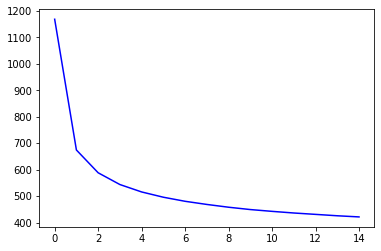

In [14]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

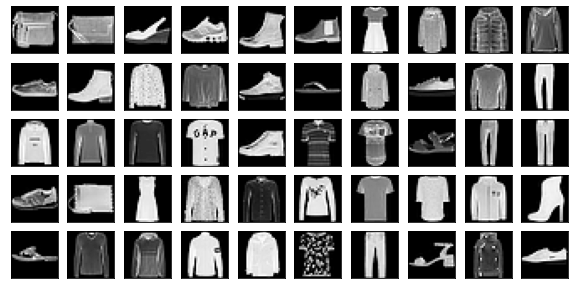

In [15]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

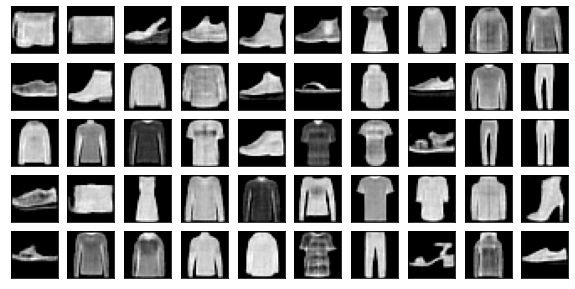

In [16]:
samples = samples.reshape(-1, 28, 28, 1)
reduced = enc_cnn.predict(samples)
recovered = dec_cnn.predict(reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))